'R0 is the distance between the box and the goal of the box\n   R1 is the mean distance bewtween box and robot finger tips"\n   R is  reward = 750 * reward_term_1 + 250 * reward_term_2 where \n    reward_term_1 is the delta the fingertips got gloser to the box,\n    and reward_term_2 is the delta of how much th box has gotten closer to the target position \n'

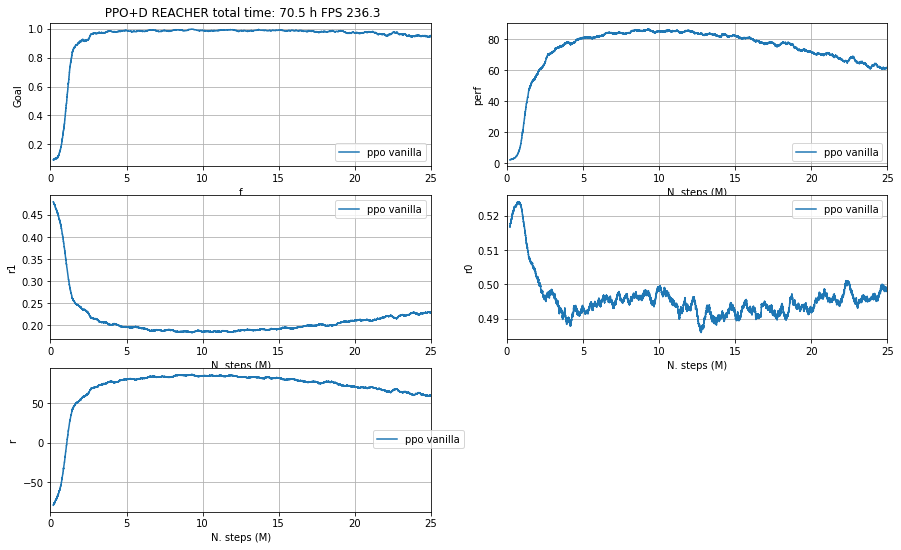

In [138]:
# from  glob import glob
from time import sleep
from baselines.bench import load_results
from matplotlib import pylab as plt
import numpy as np
import argparse
import os
import pandas as pd
from  glob import glob





def get_data(my_dir):
    num_good_traj = 0
    
    exps = glob(my_dir+'*')
    d = exps[0]
    df = load_results(d)
    #df = pd.DataFrame() 

    df['f']= df['l'].cumsum()/1000000

    df['perf']= df['r']
    df['perf'].where(df['perf']>0,0,inplace=True)
    df['goal'] = df['perf']>0.9  #guess a threadshold

    return df


my_dir = '/workspace8/gabriele/RUNS/exp_rrc8'
df = get_data(my_dir)



time_limit = 0
fig = plt.figure(clear=True, figsize=(15,9))

x_max = 25
roll = 1000
total_time = df['t'].iloc[-1]
total_steps = df['l'].sum()
total_episodes = df['r'].size

ax = plt.subplot(3, 2, 1)
ax.set_title(' {} total time: {:.1f} h FPS {:.1f}'.format('PPO+D REACHER',total_time/3600, total_steps/total_time))
df[['f','goal']].rolling(roll).mean().plot('f','goal',  ax=ax,label='ppo vanilla')

ax.set_ylabel('Goal')
ax.grid(True)
plt.xlim((0, x_max))

ax = plt.subplot(3, 2, 2)
df[['f','perf']].rolling(roll).mean().plot('f','perf',  ax=ax,label='ppo vanilla')
ax.set_xlabel('N. steps (M)')
ax.set_ylabel('perf')
plt.xlim((0, x_max))
ax.grid(True)

ax = plt.subplot(3, 2, 3)
df[['f','r1']].rolling(roll).mean().plot('f','r1',  ax=ax,label='ppo vanilla')
ax.set_xlabel('N. steps (M)')
ax.set_ylabel('r1')
plt.xlim((0, x_max))
ax.grid(True)

ax = plt.subplot(3, 2, 4)
df[['f','r0']].rolling(roll).mean().plot('f','r0',  ax=ax,label='ppo vanilla')
ax.set_xlabel('N. steps (M)')
ax.set_ylabel('r0')
plt.xlim((0, x_max))
ax.grid(True)

ax = plt.subplot(3, 2, 5)
df[['f','r']].rolling(roll).mean().plot('f','r',  ax=ax,label='ppo vanilla')
ax.set_xlabel('N. steps (M)')
ax.set_ylabel('r')
plt.xlim((0, x_max))
ax.grid(True)

#ax.legend(loc=4, prop={'size': 10})#
ax.legend(bbox_to_anchor=(1.1, 0.6))



"""R0 is the distance between the box and the goal of the box
   R1 is the mean distance bewtween box and robot finger tips"
   R is  reward = 750 * reward_term_1 + 250 * reward_term_2 where 
    reward_term_1 is the delta the fingertips got gloser to the box,
    and reward_term_2 is the delta of how much th box has gotten closer to the target position 
"""

In [134]:
min(df['r0'])

0.10727667390140944

In [131]:
df[-50:]

,index,r,l,t,r0,r1,goal,goal_coor,goal_or,f,perf
8510,425,-0.073399,375,17047.813119,0.347854,0.448539,False,[0. 0. 0.1],[0 0 0 1],3.191625,0.000000
8511,425,0.989165,375,17047.817113,0.332556,0.432319,True,[0. 0. 0.1],[0 0 0 1],3.192000,0.989165
8512,425,0.989012,375,17047.820268,0.332556,0.507754,True,[0. 0. 0.1],[0 0 0 1],3.192375,0.989012
8513,425,-8.522123,375,17047.823162,0.379760,0.530269,False,[0. 0. 0.1],[0 0 0 1],3.192750,0.000000
8514,425,0.971551,375,17047.823287,0.334509,0.441172,True,[0. 0. 0.1],[0 0 0 1],3.193125,0.971551
8515,425,0.989042,375,17047.824639,0.332556,0.469933,True,[0. 0. 0.1],[0 0 0 1],3.193500,0.989042
8516,425,-28.081985,375,17047.824719,0.420564,0.583728,False,[0. 0. 0.1],[0 0 0 1],3.193875,0.000000
8517,425,-2.591636,375,17047.830994,0.360909,0.450725,False,[0. 0. 0.1],[0 0 0 1],3.194250,0.000000
8518,425,0.989071,375,17047.838443,0.332556,0.449582,True,[0. 0. 0.1],[0 0 0 1],3.194625,0.989071
8519,425,-2.236775,375,17047.841560,0.359433,0.471065,False,[0. 0. 0.1],[0 0 0 1],3.195000,0.000000


In [7]:
my_dir = '/workspace8/gabriele/RUNS/exp_rrc6'
df = get_data(my_dir)

In [8]:
df

,index,r,l,t,r0,r1,goal,goal_coor,goal_or,f,perf
0,0,1874.406389,38,47.208318,0.531133,0.629166,True,[0. 0. 0.1],[0 0 0 1],0.000038,1874.406389
1,0,1797.818767,38,47.251252,0.472242,0.608552,True,[0. 0. 0.1],[0 0 0 1],0.000076,1797.818767
2,0,1395.607983,38,47.307145,0.495553,0.328020,True,[0. 0. 0.1],[0 0 0 1],0.000114,1395.607983
3,0,1927.024255,38,47.308874,0.523056,0.745151,True,[0. 0. 0.1],[0 0 0 1],0.000152,1927.024255
4,0,1850.501252,38,47.369884,0.535998,0.528101,True,[0. 0. 0.1],[0 0 0 1],0.000190,1850.501252
...,...,...,...,...,...,...,...,...,...,...,...
535,26,1752.627394,38,1184.370159,0.522929,0.694348,True,[0. 0. 0.1],[0 0 0 1],0.020368,1752.627394
536,26,1867.756322,38,1184.456574,0.510832,0.561798,True,[0. 0. 0.1],[0 0 0 1],0.020406,1867.756322
537,26,1978.768285,38,1184.462283,0.534778,0.577912,True,[0. 0. 0.1],[0 0 0 1],0.020444,1978.768285
538,26,1950.414158,38,1184.504797,0.533975,0.934582,True,[0. 0. 0.1],[0 0 0 1],0.020482,1950.414158
